<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-modules" data-toc-modified-id="Importing-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing modules</a></span></li><li><span><a href="#Setting-up-variables" data-toc-modified-id="Setting-up-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setting up variables</a></span></li><li><span><a href="#Setting-up-functions" data-toc-modified-id="Setting-up-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setting up functions</a></span></li><li><span><a href="#Trying-with-iterations" data-toc-modified-id="Trying-with-iterations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Trying with iterations</a></span></li><li><span><a href="#Try-some-plots" data-toc-modified-id="Try-some-plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Try some plots</a></span><ul class="toc-item"><li><span><a href="#Test-with-k-(n_results)" data-toc-modified-id="Test-with-k-(n_results)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Test with k (n_results)</a></span><ul class="toc-item"><li><span><a href="#Test-with-exponential-distribution" data-toc-modified-id="Test-with-exponential-distribution-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Test with exponential distribution</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-5.1.1.1"><span class="toc-item-num">5.1.1.1&nbsp;&nbsp;</span>Task 1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-5.1.1.2"><span class="toc-item-num">5.1.1.2&nbsp;&nbsp;</span>Task 2</a></span></li></ul></li></ul></li><li><span><a href="#Test-with-m-(n_queries)" data-toc-modified-id="Test-with-m-(n_queries)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Test with m (n_queries)</a></span><ul class="toc-item"><li><span><a href="#Test-with-lienar-distribution" data-toc-modified-id="Test-with-lienar-distribution-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Test with lienar distribution</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-5.2.1.1"><span class="toc-item-num">5.2.1.1&nbsp;&nbsp;</span>Task 1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-5.2.1.2"><span class="toc-item-num">5.2.1.2&nbsp;&nbsp;</span>Task 2</a></span></li></ul></li></ul></li><li><span><a href="#Test-with-n-(n_documents):" data-toc-modified-id="Test-with-n-(n_documents):-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Test with n (n_documents):</a></span><ul class="toc-item"><li><span><a href="#First-make-some-truncated-files" data-toc-modified-id="First-make-some-truncated-files-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>First make some truncated files</a></span></li><li><span><a href="#define-function-to-delete-such-files:" data-toc-modified-id="define-function-to-delete-such-files:-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>define function to delete such files:</a></span></li><li><span><a href="#Task-1" data-toc-modified-id="Task-1-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Task 1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>Task 2</a></span></li></ul></li></ul></li><li><span><a href="#Now-we-make-a-integrated-subplots" data-toc-modified-id="Now-we-make-a-integrated-subplots-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Now we make a integrated subplots</a></span><ul class="toc-item"><li><span><a href="#Defining-a-subplot/full-plot-function" data-toc-modified-id="Defining-a-subplot/full-plot-function-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Defining a subplot/full plot function</a></span></li><li><span><a href="#Setting-the-variables-used-in-function" data-toc-modified-id="Setting-the-variables-used-in-function-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Setting the variables used in function</a></span></li><li><span><a href="#Call-the-function" data-toc-modified-id="Call-the-function-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Call the function</a></span></li></ul></li></ul></div>

# Importing modules

In [216]:
import time
import os
import re
import os.path
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from subprocess import call, run, check_output

# Setting up variables

In [78]:
queries = [] # all the queries
lst_queries = [] # all the queries
data_dir = "./data"
for file in os.listdir(data_dir):
    if file.endswith(".txt"):
        queries.append(file[:-4])
        lst_queries.append(file[:-4])

In [196]:
# number of iterations
n_iter = 15

# k
# default n_result
n_results = 20
# 1000, 2000, ...., 100000
lin_n_results = np.arange(1000, 100000, 1000)

# +5 here because I want to explore when the n_results gets larger than
# n_documents, how does the program behave, default should be +2
exp_n_results = np.concatenate([[0], 
                                np.logspace(0, int(np.log2(1e+5))+3,
                                            base=2)], axis=0)
# 0, 2, 4, 8, 16... 131072

# m
lin_n_queries = np.concatenate([np.arange(1, len(queries), 10),
                                [len(queries)]], axis=0)

# n
lin_n_documents = np.arange(0, 100000, 2500)


#t
tasks = np.array([1, 2])

# Setting up functions

In [209]:
"""
get a random subset from list
"""
def get_subset(queries, nele=5):
    return np.random.choice(queries, nele)
    
"""
print formatted result with newlines
"""
def check_result(*args, **kwargs):
    print(str(check_output(format_input(*args, **kwargs)), 'utf-8'))
    
"""
************************************************************************
make a formatted inputs.
task: integer of the task number 
n_results: integer of number of result to display
file: the location of executable a1
*queries: queries used in program
************************************************************************
"""
def format_input(task, n_results, *queries, file="./a1"):
    if len(queries) == 1 and (type(queries[0]) is int or type(queries[0]) is np.int64):
        queries = get_subset(lst_queries, queries[0])
    elif len(queries) == 2 and (type(queries[0]) is int or type(queries[0]) is np.int64(:
#         print("queries\n", queries)
#         print("type queries[1]\n", type(queries[1]))
#         print("len queries\n", len(queries))
        if type(queries[1]) is list:
            queries = get_subset(queries[1], queries[0])
        else:
            raise Exception("False input")
    return [file, "-t", str(task), "-r", str(n_results), *queries]

"""
make a formatted run and return time it takes to execute
"""
def time_run(n_iter, *args, **kwargs):
    dts = 0
    for i in range(n_iter):
        inputs = format_input(*args, **kwargs)
        t1 = time.time()
#         print(format_input(*args, **kwargs))
        code = run(inputs).returncode
        dts += (time.time()-t1)
        if code:
            print("Error with arguments:", args, "And kwargs", 
                  list(kwargs.items()), "And the full inputs are",
                  inputs, "Which give return code:", code)
    return dts/n_iter*1000

"""
format output of time_run same as %timeit
"""
def formatted_time_run(n_iter, *args, **kwargs):
    t = time_run(n_iter, *args, **kwargs)
    print("{} loops, {:.2f} ms per loop".format(n_iter, t))

# Trying with iterations

If any of the following printed result is 1. Means your program has bugs in it!

In [30]:
print("task1")
print(call(["./a1", "-t", "1", "-r", "10000", "algorithms", "are", "fun"]))
print(call(["./a1", "-t", "1", "-r", "0", "algorithms", "are", "fun"]))
print(call(["./a1", "-t", "1", "-r", "100000", "algorithms"]))
print(call(["./a1", "-t", "1", "-r", "1000000", "algorithms"]))
print("task2")
print(call(["./a1", "-t", "2", "-r", "10000", "algorithms", "are", "fun"]))
print(call(["./a1", "-t", "2", "-r", "0", "algorithms", "are", "fun"]))
print(call(["./a1", "-t", "2", "-r", "100000", "algorithms"]))
print(call(["./a1", "-t", "2", "-r", "1000000", "algorithms"]))

task1
0
0
0
0
task2
0
0
0
0


Try some sample iterations

In [55]:
formatted_time_run(30, 1, 10000, "algorithms")
formatted_time_run(30, 2, 10000, "algorithms")
formatted_time_run(30, 1, 10000, "algorithms", "are", "fun")
formatted_time_run(30, 2, 10000, "algorithms", "are", "fun")
%timeit run(["./a1", "-t", "1", "-r", "10000", "algorithms", "are", "fun"])
%timeit run(["./a1", "-t", "2", "-r", "10000", "algorithms", "are", "fun"])

30 loops, 13.01 ms per loop
30 loops, 11.89 ms per loop
30 loops, 113.32 ms per loop
30 loops, 103.26 ms per loop
10 loops, best of 3: 101 ms per loop
10 loops, best of 3: 100 ms per loop


# Try some plots
These are for tests, the formal plot are below.
check doc string of the parsed functions

## Test with k (n_results)

### Test with exponential distribution

In [139]:
# dispatched no longer used
subset1 = get_subset(queries)
subset1  # This is the queries used to test program

array(['today', 'battle', 'banana', 'his', 'mythology'], dtype='<U14')

#### Task 1

In [56]:
y_expk_1 = []
for i in exp_n_results:
    y_expk_1.append(time_run(n_iter, 1, i, 3))

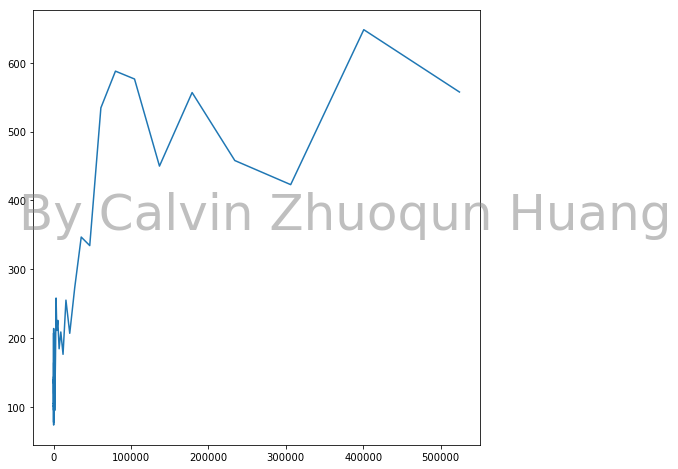

In [57]:
fig = plt.figure(figsize=[8,8])
plt.plot(exp_n_results, y_expk_1)
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

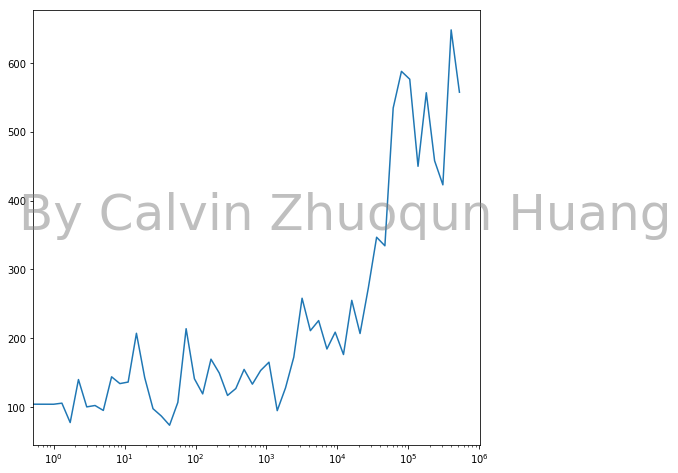

In [58]:
fig = plt.figure(figsize=[8,8])
plt.plot(exp_n_results, y_expk_1)
plt.xscale("log")
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

#### Task 2

In [60]:
y_expk_2 = []

for i in exp_n_results:
    y_expk_2.append(time_run(n_iter, 2, i, 3))

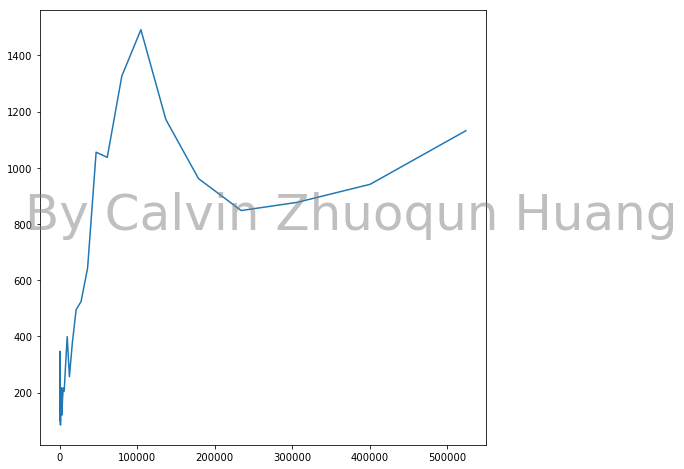

In [61]:
fig = plt.figure(figsize=[8,8])
plt.plot(exp_n_results, y_expk_2)
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

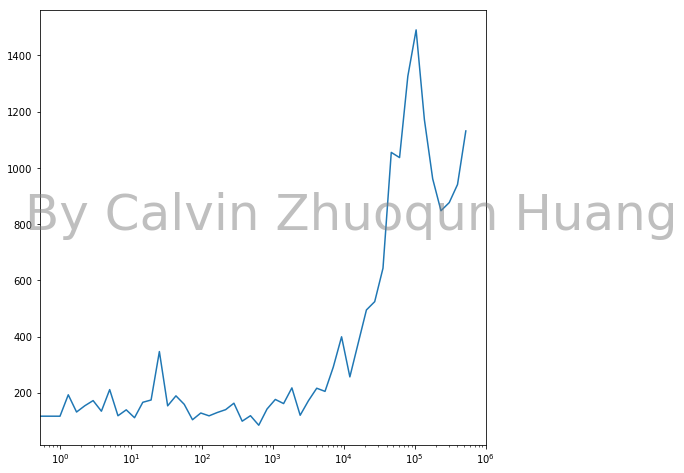

In [62]:
fig = plt.figure(figsize=[8,8])
plt.plot(exp_n_results, y_expk_2)
plt.xscale("log")
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

## Test with m (n_queries)

### Test with lienar distribution

#### Task 1

In [210]:
y_linm_1 = []
for i in lin_n_queries:
    y_linm_1.append(time_run(n_iter, 1, n_results, i))
y_linm_1

[48.17140897115071,
 297.40460713704425,
 519.8273976643881,
 1157.7957153320312,
 3054.8973719278974,
 1315.6709829966226,
 1865.416955947876,
 2032.713460922241,
 2155.3500334421797,
 2825.510549545288,
 2518.1647777557373,
 2896.40375773112,
 3167.7873929341636,
 3317.589537302653]

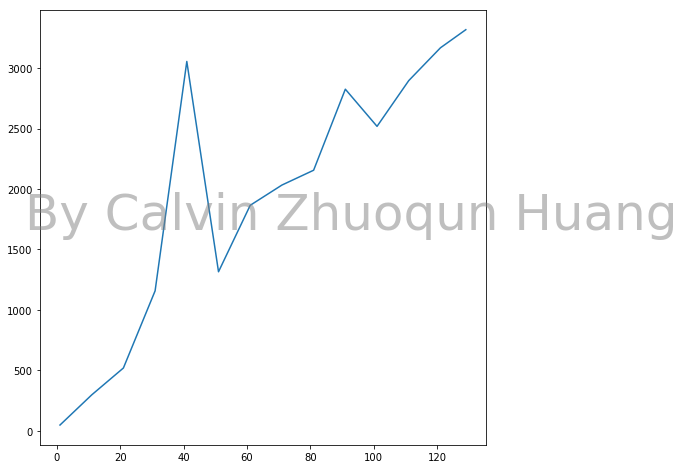

In [215]:
fig = plt.figure(figsize=[8,8])
plt.plot(lin_n_queries, y_linm_1)
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

#### Task 2

In [212]:
y_linm_2 = []
for i in lin_n_queries:
    y_linm_2.append(time_run(n_iter, 2, n_results, i))

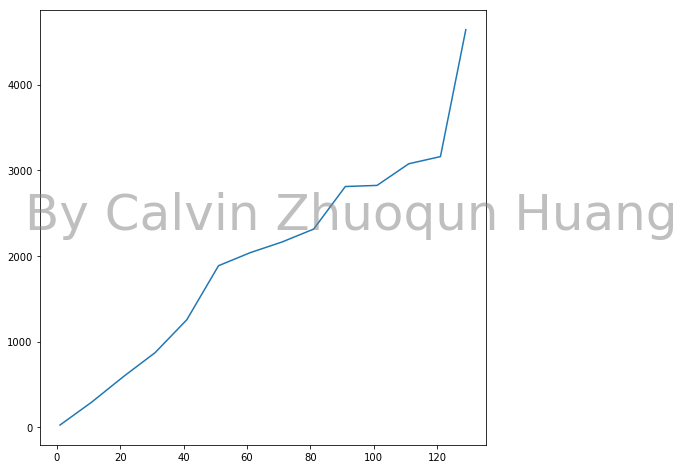

In [213]:
fig = plt.figure(figsize=[8,8])
plt.plot(lin_n_queries, y_linm_2)
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

## Test with n (n_documents):

### First make some truncated files

In [167]:
vanilla_queries = get_subset(queries, 20)
lst_extra_queries = {i:[j+"_{}".format(i) for j in vanilla_queries] for i in lin_n_documents}

for query in vanilla_queries:
    exit = 0
    file = query+".txt"
    cur_list = []
    with open(os.path.join(data_dir, file), "r") as f:
        ind = 0
        while True:
            line = f.readline()
            if not line or exit:
                break
            doc, score = line.split()
            while lin_n_documents[ind] < int(doc):
                with open(os.path.join(data_dir, 
                                       query+"_{}.txt".format(
                                           lin_n_documents[ind])), 
                                  'w') as file_handler:
                    for item in cur_list:
                        file_handler.write("{}\n".format(item))
                    
                ind += 1
                if ind >= len(lin_n_documents):
                    exit = 1
                    break
            cur_list.append(line)
        while ind < len(lin_n_documents):
            ind += 1
            with open(os.path.join(data_dir, 
                                   query+"_{}.txt".format(
                                       lin_n_documents[ind])), 
                              'w') as file_handler:
                for item in cur_list:
                    file_handler.write("{}\n".format(item))

lst_extra_queries

{0: ['in_0',
  'back_0',
  'day_0',
  'there_0',
  'game_0',
  'or_0',
  'universe_0',
  'mythology_0',
  'fun_0',
  'turtle_0',
  'be_0',
  'of_0',
  'b_0',
  'dog_0',
  'she_0',
  'said_0',
  'said_0',
  'universe_0',
  'smart_0',
  'were_0'],
 2500: ['in_2500',
  'back_2500',
  'day_2500',
  'there_2500',
  'game_2500',
  'or_2500',
  'universe_2500',
  'mythology_2500',
  'fun_2500',
  'turtle_2500',
  'be_2500',
  'of_2500',
  'b_2500',
  'dog_2500',
  'she_2500',
  'said_2500',
  'said_2500',
  'universe_2500',
  'smart_2500',
  'were_2500'],
 5000: ['in_5000',
  'back_5000',
  'day_5000',
  'there_5000',
  'game_5000',
  'or_5000',
  'universe_5000',
  'mythology_5000',
  'fun_5000',
  'turtle_5000',
  'be_5000',
  'of_5000',
  'b_5000',
  'dog_5000',
  'she_5000',
  'said_5000',
  'said_5000',
  'universe_5000',
  'smart_5000',
  'were_5000'],
 7500: ['in_7500',
  'back_7500',
  'day_7500',
  'there_7500',
  'game_7500',
  'or_7500',
  'universe_7500',
  'mythology_7500',
  'fu

### define function to delete such files:

In [142]:
def del_extra(path=data_dir):
    pattern = re.compile(".*_[0-9]+.txt")
    for file in os.listdir(path):
        if re.match(pattern, file):
            os.remove(os.path.join(path, file))

In [166]:
# del_extra()

### Task 1

In [172]:
y_linn_1 = []
for i in lin_n_documents:
    y_linn_1.append(time_run(n_iter, 1, n_results, 3, lst_extra_queries[i]))
y_linn_1

[33.51092338562012,
 47.77545928955078,
 72.72849082946777,
 56.642699241638184,
 89.08774852752686,
 398.90949726104736,
 150.3068208694458,
 55.70387840270996,
 54.50539588928223,
 45.0688362121582,
 54.234981536865234,
 62.00976371765137,
 67.59397983551025,
 109.75627899169922,
 69.27673816680908,
 61.56325340270996,
 106.8770170211792,
 288.9400005340576,
 119.26703453063965,
 75.08707046508789,
 64.70251083374023,
 103.7940263748169,
 89.00470733642578,
 55.09793758392334,
 93.87757778167725,
 117.90363788604736,
 102.31640338897705,
 56.41376972198486,
 111.3163709640503,
 176.60095691680908,
 150.11675357818604,
 158.28497409820557,
 85.90717315673828,
 86.23800277709961,
 89.07763957977295,
 119.96006965637207,
 82.20200538635254,
 143.05992126464844,
 104.80039119720459,
 150.67331790924072]

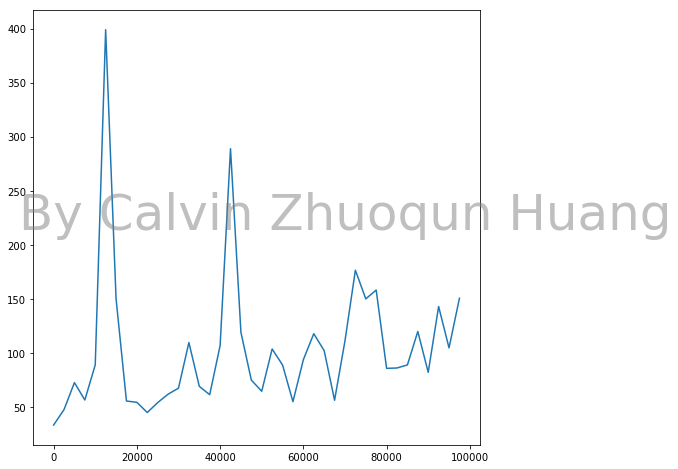

In [169]:
fig = plt.figure(figsize=[8,8])
plt.plot(lin_n_documents, y_linn_1)
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

### Task 2

In [170]:
y_linn_2 = []
for i in lin_n_documents:
    y_linn_2.append(time_run(n_iter, 2, n_results, 3, lst_extra_queries[i]))
y_linn_2

[19.228053092956543,
 27.69932746887207,
 27.288818359375,
 33.70790481567383,
 29.617929458618164,
 34.05308723449707,
 29.3379545211792,
 45.06421089172363,
 34.972572326660156,
 52.46853828430176,
 46.49045467376709,
 42.03848838806152,
 50.73132514953613,
 52.76591777801514,
 59.51879024505615,
 74.29959774017334,
 55.663108825683594,
 43.87497901916504,
 156.15389347076416,
 65.34912586212158,
 66.8879508972168,
 71.80790901184082,
 56.26368522644043,
 50.742435455322266,
 72.76854515075684,
 49.214911460876465,
 50.1093864440918,
 80.79993724822998,
 125.05822181701659,
 60.26432514190674,
 71.33457660675049,
 122.66836166381836,
 65.86270332336426,
 70.10397911071777,
 74.61326122283936,
 61.925649642944336,
 117.11525917053223,
 122.02780246734619,
 76.37996673583984,
 125.6723403930664]

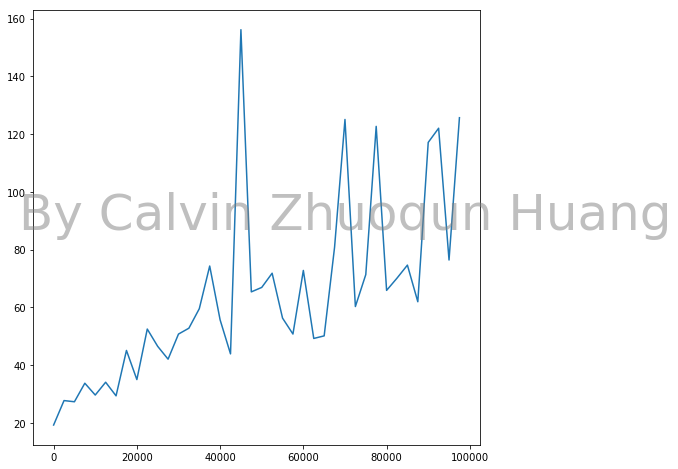

In [171]:
fig = plt.figure(figsize=[8,8])
plt.plot(lin_n_documents, y_linn_2)
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

# Now we make a integrated subplots

## Defining a subplot/full plot function

In [219]:
"""
make a subplot with argsubplot position and corresponding settings.
"""
def subplot_graph(x, y, argsubplot, title=None, xlabel=None, 
                  ylabel=None, xscale=None, yscale=None, *args):
    if type(argsubplot) is str:
        plt.subplot(argsubplot)
    else:
        plt.subplot(*argsubplot)
    print(title)
    plt.gca().plot(x, y, *args)
    if title: plt.gca().set_title(title)
    if xlabel: plt.gca().set_xlabel(xlabel)
    if ylabel: plt.gca().set_ylabel(ylabel)
    if xscale: plt.gca().set_xscale(xscale)
    if yscale: plt.gca().set_yscale(yscale)
    return plt.gca()


"""
return 
xs: list of array of x coordinates
ys: list of array of y coordinates
titles: list of titles
xlabels: list of xlabels
ylabels: list of xlabels
xscales: list of xscales
yscales: list of yscales
args: list of list of plotting styles.[[style1, style2],[style1, style2]]
watermark: watermark if you want to add one
figsize: size of the figure, best option will be [15, 15] or None
save: if specified, save the figure with such filename
"""
def full_plot(xs, ys, titles=None, xlabels=None, ylabels=None, 
              xscales=None, yscales=None, args=None, watermark=None,
              figsize=None, save=False):
    if figsize: fig = plt.figure(figsize=figsize)
    else: fig = plt.figure(figsize=[15, 15])
    
    width = 4
    height = len(xs) // width + 1
    
    for i in range(len(xs)):
        subplot_graph(xs[i], ys[i], [height, width, i + 1], titles[i],
                          xlabels[i], ylabels[i], xscales[i], yscales[i],
                          *(args[i]))
    
    if watermark:
        fig.text(0.1, 0.7, watermark,fontsize=50, 
                 color='gray',alpha=0.5)
        
    if save: plt.savefig(save)
    
    plt.show()

## Setting the variables used in function

In [222]:
xs = [exp_n_results,exp_n_results,lin_n_queries, lin_n_documents,
      exp_n_results,exp_n_results,lin_n_queries, lin_n_documents]

ys = [y_expk_1, y_expk_1, y_linm_1, y_linn_1,
      y_expk_2, y_expk_2, y_linm_2, y_linn_2]

titles = ["n_results linear plot with task 1",
          "n_results log plot with task 1",
          "n_queries linear plot with task 1",
          "n_documents linear plot with task 1",
          "n_results linear plot with task 2",
          "n_results log plot with task 2",
          "n_queries linear plot with task 2",
          "n_documents linear plot with task 2",]

xlabels = ["number of results", "number of results", 
           "number of queries", "number of documents"] * 2
ylabels = ["time/ms"] * 8

xscales = [None, "log", None, None] * 2
yscales = [None, None, None, None] * 2

args = [["ro-"]] * 4 + [["b*-"]]*4

figsize = [20, 20]

# **************************************************************************
# Set this to ur own name
# **************************************************************************
watermark = "By Calvin Zhuoqun Huang"

save = "plot.png"

## Call the function

n_results linear plot with task 1
n_results log plot with task 1
n_queries linear plot with task 1
n_documents linear plot with task 1
n_results linear plot with task 2
n_results log plot with task 2
n_queries linear plot with task 2
n_documents linear plot with task 2


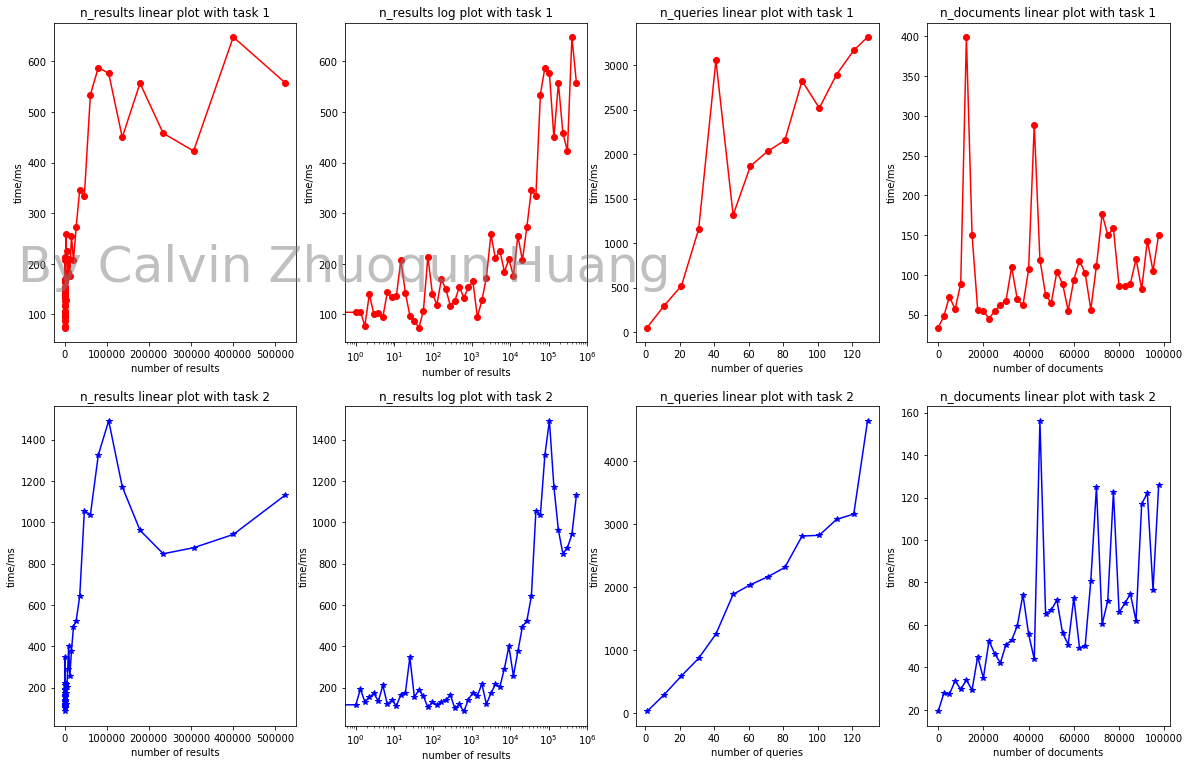

In [223]:
full_plot(xs, ys, titles, xlabels, ylabels, 
              xscales, yscales, args, watermark,
              figsize, save)

In [ ]:
# fig = plt.figure(figsize=[15, 15])
# subplot_graph(exp_n_results, y_expk_1, 231, "n_results linear plot with task 1", 
#               "number of results", "time/ms", 
#               None, None, "r*-")
# subplot_graph(exp_n_results, y_expk_1, 232, "n_results log plot with task 1", 
#               "number of results", "time/ms", 
#               "log", None, "r*-")
# subplot_graph(lin_n_queries, y_linm_1, 233, "n_queries linear plot with task 1", 
#               "number of queries", "time/ms", 
#               None, None, "r*-")
# subplot_graph(exp_n_results, y_expk_2, 234, "n_results linear plot with task 2", 
#               "number of results", "time/ms", 
#               None, None, "b*-")
# subplot_graph(exp_n_results, y_expk_2, 235, "n_results log plot with task 2", 
#               "number of results", "time/ms", 
#               "log", None, "b*-")
# subplot_graph(lin_n_queries, y_linm_2, 236, "n_queries linear plot with task 2", 
#               "number of results", "time/ms", 
#               None, None, "b*-")
# fig.text(0.1, 0.5, "Created by Calvin Zhuoqun Huang",
#          fontsize=50, color='gray',alpha=0.5)
# plt.savefig("plots.png")
# plt.show()
